In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Dataset

In [3]:
df = pd.read_csv('./mental_health_diagnosis_treatment_.csv')
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [5]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
rename_cols = {
    'Patient ID' : 'ID',
    'Symptom Severity (1-10)' : 'Symptom_Severity',
    'Mood Score (1-10)' : 'Mood_Score',
    'Sleep Quality (1-10)' : 'Sleep_Quality',
    'Physical Activity (hrs/week)' : 'Physical_Activity',
    'Therapy Type' : 'Therapy_Type',
    'Treatment Start Date' : 'Treatment_Start_Date',
    'Treatment Duration (weeks)' : 'Treatment_Duration',
    'Stress Level (1-10)' : 'Stress_Level',
    'Treatment Progress (1-10)' : 'Treatment_Progress',
    'AI-Detected Emotional State' : 'AI-Detected_Emotional_State',
    'Adherence to Treatment (%)' : 'Adherence_to_Treatment'
}

df = df.rename(columns = rename_cols)
df.head()

,ID,Age,Gender,Diagnosis,Symptom_Severity,Mood_Score,Sleep_Quality,Physical_Activity,Medication,Therapy_Type,Treatment_Start_Date,Treatment_Duration,Stress_Level,Outcome,Treatment_Progress,AI-Detected_Emotional_State,Adherence_to_Treatment
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [7]:
df.duplicated().sum()

0

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['ID', 'Age', 'Symptom_Severity', 'Mood_Score', 'Sleep_Quality',
       'Physical_Activity', 'Treatment_Duration', 'Stress_Level',
       'Treatment_Progress', 'Adherence_to_Treatment'],
      dtype='object')

In [9]:
category_cols = df.select_dtypes(include='object').columns
category_cols

Index(['Gender', 'Diagnosis', 'Medication', 'Therapy_Type',
       'Treatment_Start_Date', 'Outcome', 'AI-Detected_Emotional_State'],
      dtype='object')

In [10]:
tot_len= 0
for i in df.columns:
    if i not in numeric_cols:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(df[i].value_counts())
        tot_len= tot_len+ df[i].nunique()
        print()
        print()

                 GENDER                  
Gender
Male      266
Female    234
Name: count, dtype: int64


                DIAGNOSIS                
Diagnosis
Generalized Anxiety          135
Major Depressive Disorder    125
Bipolar Disorder             124
Panic Disorder               116
Name: count, dtype: int64


               MEDICATION                
Medication
Benzodiazepines     90
SSRIs               89
Mood Stabilizers    87
Antipsychotics      87
Antidepressants     76
Anxiolytics         71
Name: count, dtype: int64


              THERAPY_TYPE               
Therapy_Type
Mindfulness-Based Therapy         130
Dialectical Behavioral Therapy    129
Interpersonal Therapy             124
Cognitive Behavioral Therapy      117
Name: count, dtype: int64


          TREATMENT_START_DATE           
Treatment_Start_Date
2024-03-25    13
2024-01-16    13
2024-03-23    12
2024-01-24    10
2024-01-26     9
              ..
2024-02-11     2
2024-02-10     2
2024-04-05     1
2024-04-07   

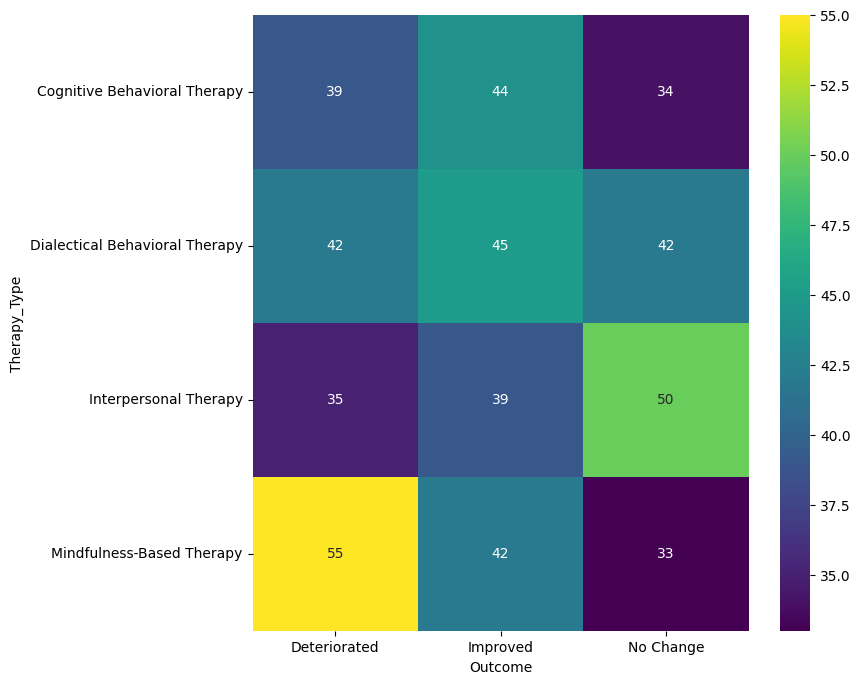

In [11]:
# @title Outcome vs Therapy_Type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Therapy_Type'].value_counts()
    for x_label, grp in df.groupby('Outcome')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('Outcome')
_ = plt.ylabel('Therapy_Type')

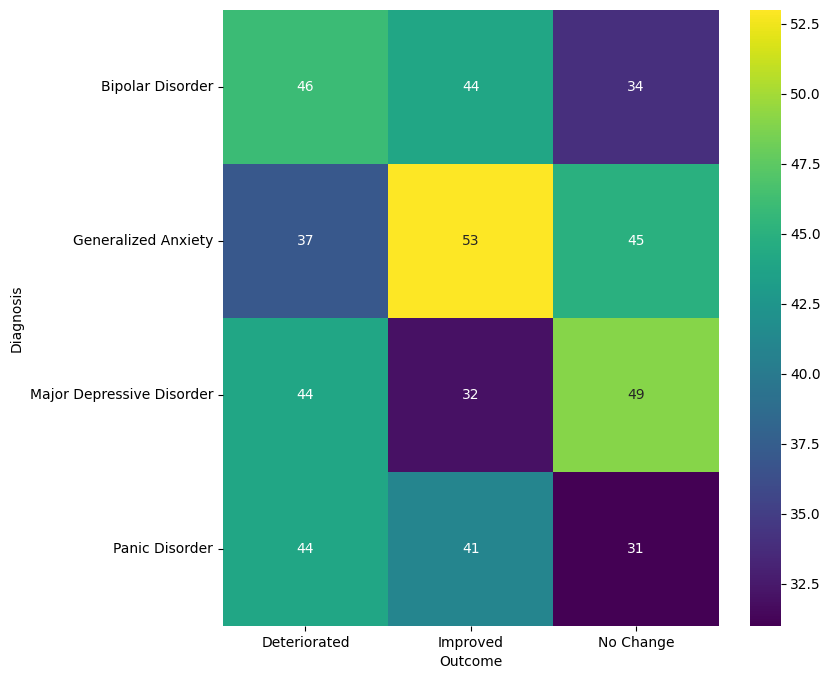

In [12]:
# @title Outcome vs Diagnosis

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Diagnosis'].value_counts()
    for x_label, grp in df.groupby('Outcome')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('Outcome')
_ = plt.ylabel('Diagnosis')

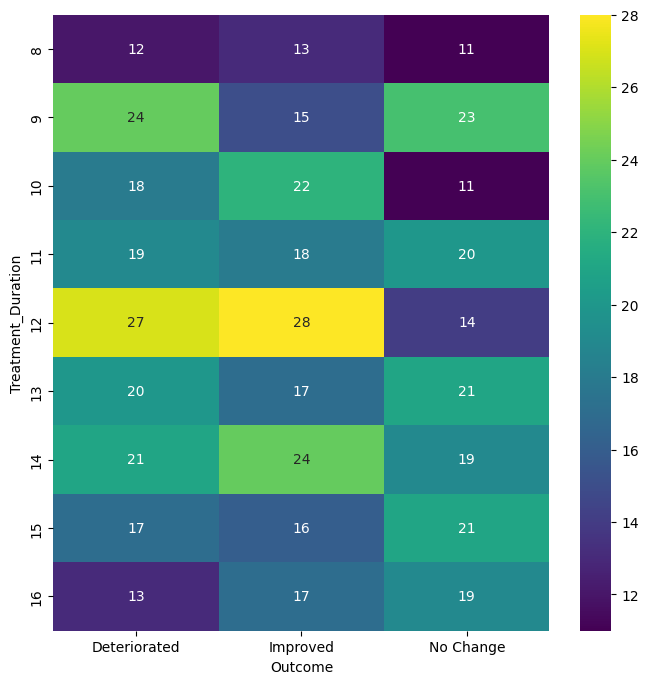

In [13]:
# @title Outcome vs Treatment_Duration

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Treatment_Duration'].value_counts()
    for x_label, grp in df.groupby('Outcome')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('Outcome')
_ = plt.ylabel('Treatment_Duration')

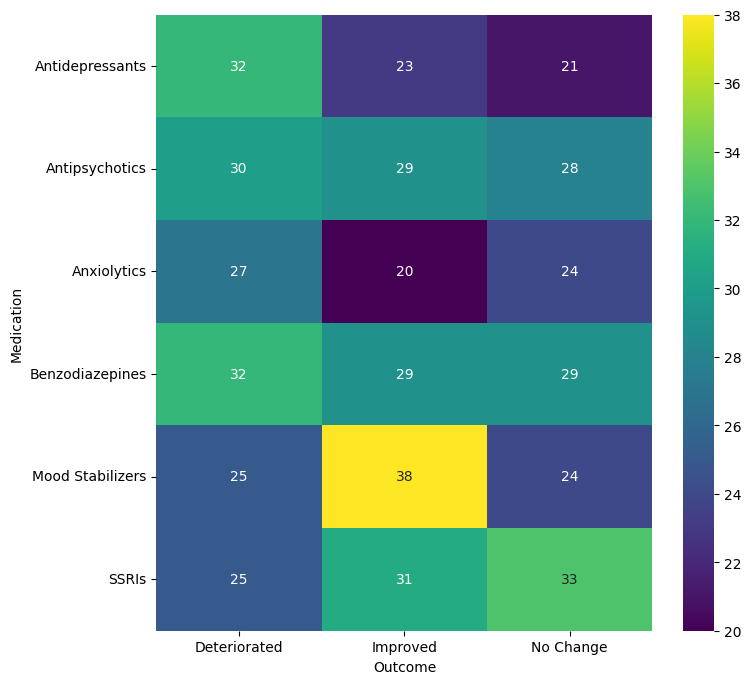

In [14]:
# @title Outcome vs Medication

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Medication'].value_counts()
    for x_label, grp in df.groupby('Outcome')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('Outcome')
_ = plt.ylabel('Medication')

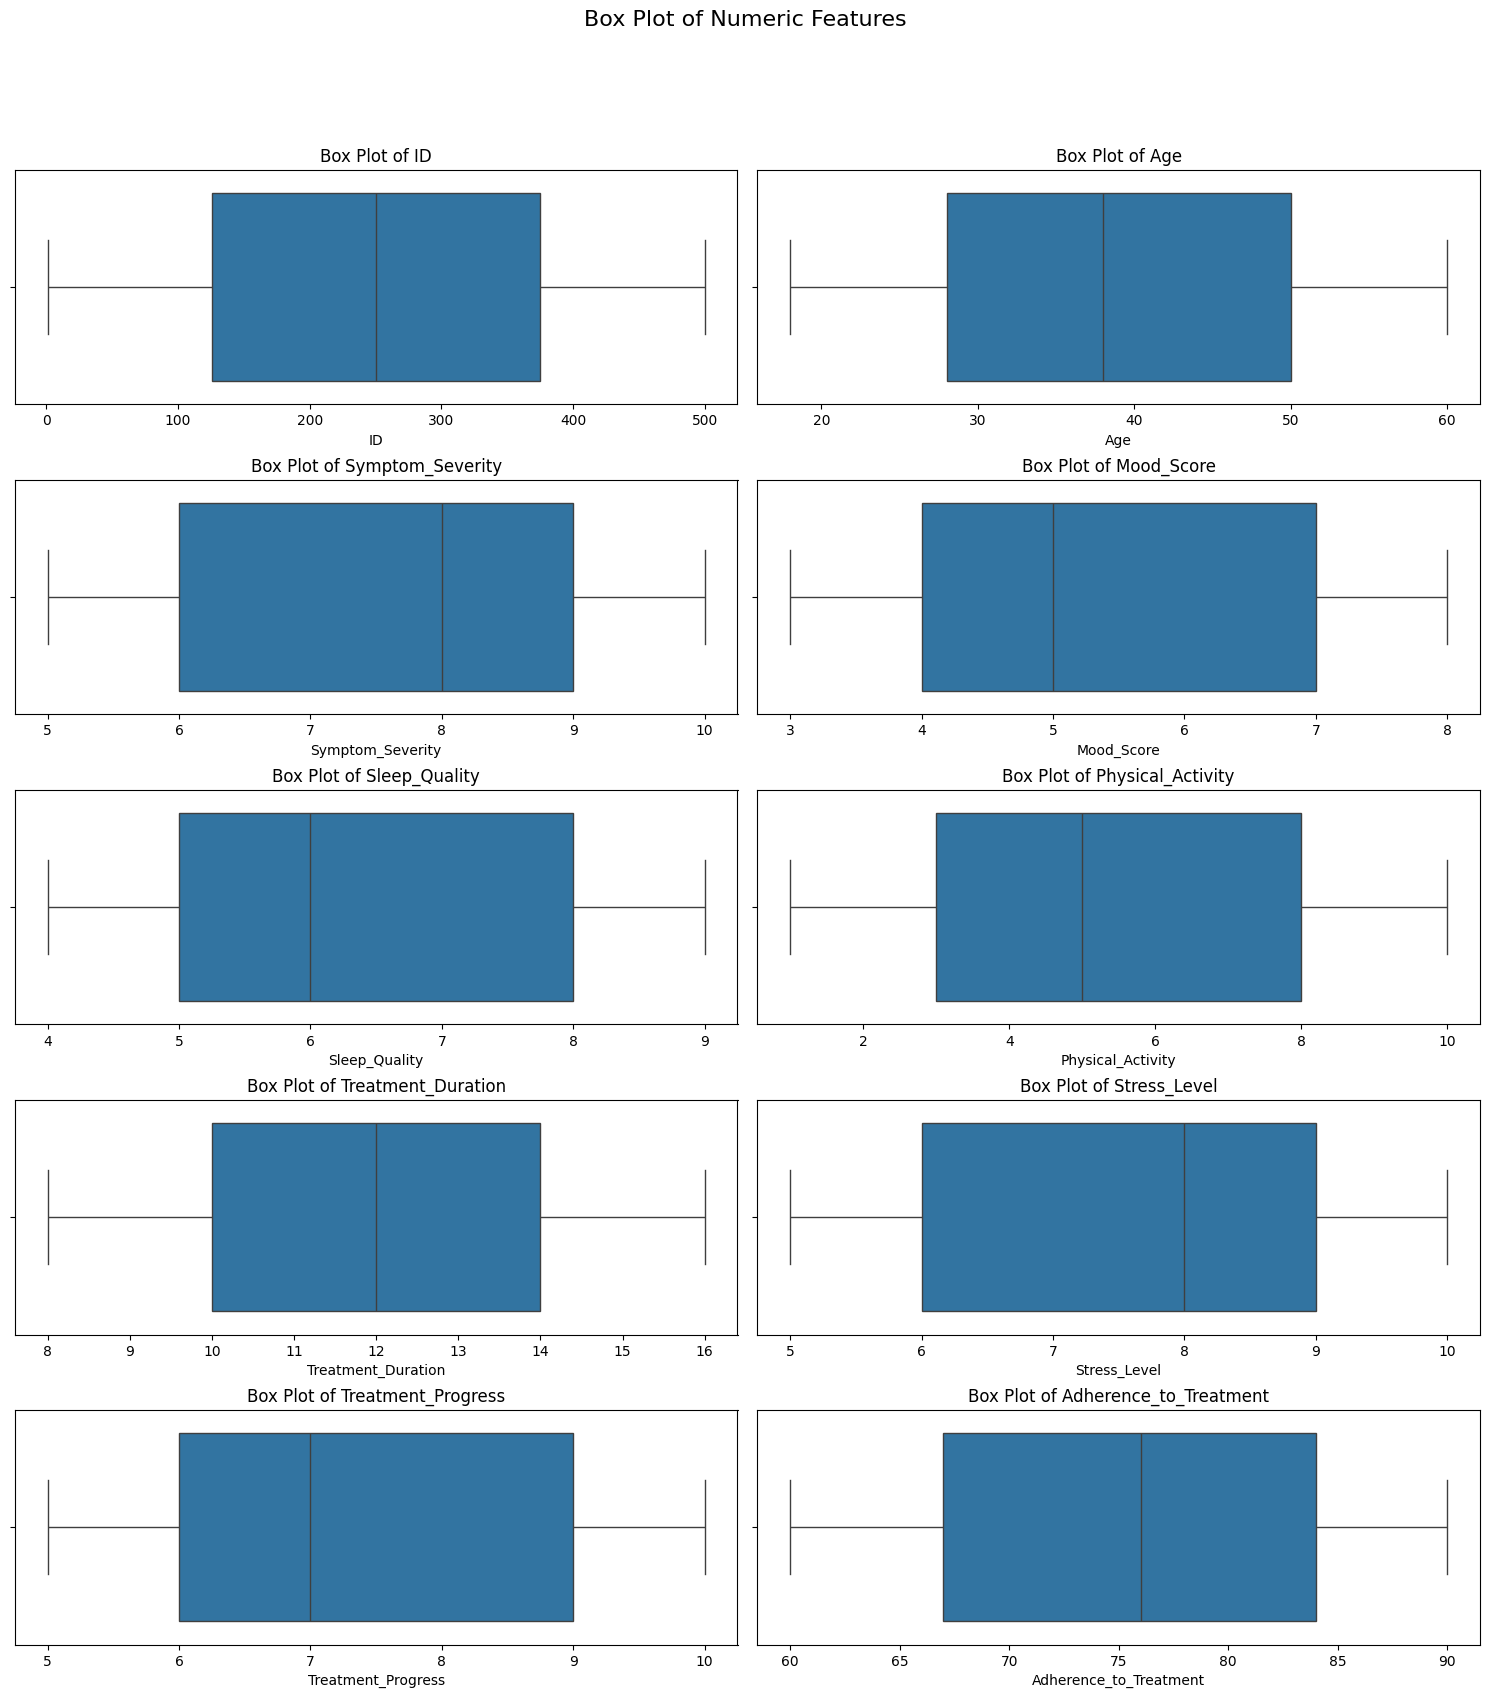

In [15]:
n_rows = 6
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(numeric_cols):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

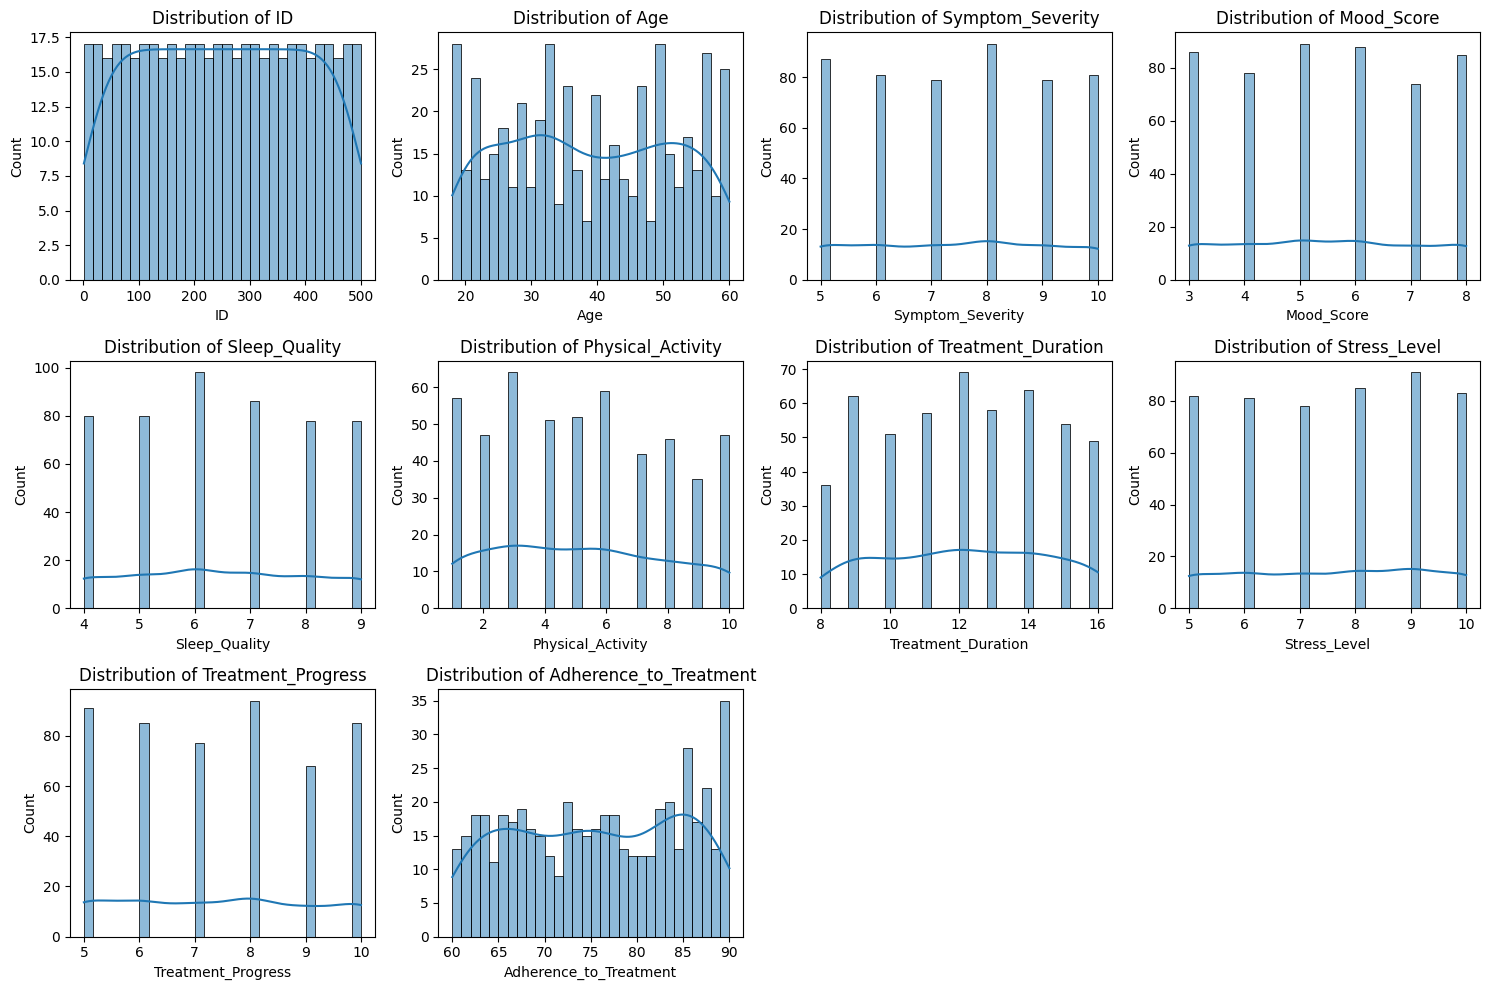

In [16]:
columns_to_plot = ['ID', 'Age', 'Symptom_Severity', 'Mood_Score', 'Sleep_Quality',
       'Physical_Activity', 'Treatment_Duration', 'Stress_Level',
       'Treatment_Progress', 'Adherence_to_Treatment']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Preprocessing

In [17]:
clas_df = df.copy()
clas_df.head()

,ID,Age,Gender,Diagnosis,Symptom_Severity,Mood_Score,Sleep_Quality,Physical_Activity,Medication,Therapy_Type,Treatment_Start_Date,Treatment_Duration,Stress_Level,Outcome,Treatment_Progress,AI-Detected_Emotional_State,Adherence_to_Treatment
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [18]:
clas_df.drop(['ID', 'Treatment_Start_Date'], axis=1, inplace=True)
clas_df.head()

,Age,Gender,Diagnosis,Symptom_Severity,Mood_Score,Sleep_Quality,Physical_Activity,Medication,Therapy_Type,Treatment_Duration,Stress_Level,Outcome,Treatment_Progress,AI-Detected_Emotional_State,Adherence_to_Treatment
0,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,11,9,Deteriorated,7,Anxious,66
1,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,11,7,No Change,7,Neutral,78
2,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,14,7,Deteriorated,5,Happy,62
3,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,8,8,Deteriorated,10,Excited,72
4,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,12,5,Deteriorated,6,Excited,63


In [19]:
X = clas_df.drop('Outcome', axis=1)
y = clas_df['Outcome']

In [20]:
category_cols = X.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

for col in category_cols:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,Age,Gender,Diagnosis,Symptom_Severity,Mood_Score,Sleep_Quality,Physical_Activity,Medication,Therapy_Type,Treatment_Duration,Stress_Level,Treatment_Progress,AI-Detected_Emotional_State,Adherence_to_Treatment
0,43,0,2,10,5,8,5,4,2,11,9,7,0,66
1,40,0,2,9,5,4,7,1,2,11,7,7,4,78
2,55,0,2,6,3,4,3,5,3,14,7,5,3,62
3,34,0,2,6,3,6,5,5,3,8,8,10,2,72
4,52,1,3,7,6,6,8,2,2,12,5,6,2,63


In [21]:
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

X

,Age,Gender,Diagnosis,Symptom_Severity,Mood_Score,Sleep_Quality,Physical_Activity,Medication,Therapy_Type,Treatment_Duration,Stress_Level,Treatment_Progress,AI-Detected_Emotional_State,Adherence_to_Treatment
0,0.337960,-1.066186,0.485687,1.479563,-0.282569,0.916893,-0.076418,0.828801,0.419014,-0.455212,0.853780,-0.252997,-1.394532,-1.041433
1,0.101735,-1.066186,0.485687,0.892900,-0.282569,-1.483350,0.631160,-0.927134,0.419014,-0.455212,-0.317386,-0.252997,0.899106,0.280462
2,1.282864,-1.066186,0.485687,-0.867087,-1.455055,-1.483350,-0.783997,1.414113,1.318185,0.775092,-0.317386,-1.413533,0.325697,-1.482064
3,-0.370717,-1.066186,0.485687,-0.867087,-1.455055,-0.283229,-0.076418,1.414113,1.318185,-1.685517,0.268197,1.487808,-0.247713,-0.380485
4,1.046638,0.937923,1.395212,-0.280425,0.303674,-0.283229,0.984949,-0.341822,0.419014,-0.045111,-1.488553,-0.833265,-0.247713,-1.371906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.158136,0.937923,-0.423839,1.479563,-0.868812,0.916893,0.277371,0.828801,-0.480158,-1.685517,0.853780,1.487808,-0.821123,-0.270327
496,-1.315620,0.937923,1.395212,-1.453750,0.303674,-0.283229,0.631160,0.243490,1.318185,0.364990,-0.902969,0.327271,0.325697,1.161725
497,-1.236878,0.937923,0.485687,-0.280425,-1.455055,-1.483350,-1.137786,-1.512445,-1.379329,-0.865314,-1.488553,-1.413533,0.899106,1.271883
498,0.731670,0.937923,-1.333364,0.892900,-0.868812,-0.283229,1.338738,-1.512445,1.318185,-0.865314,-0.902969,-0.252997,-1.394532,-0.270327


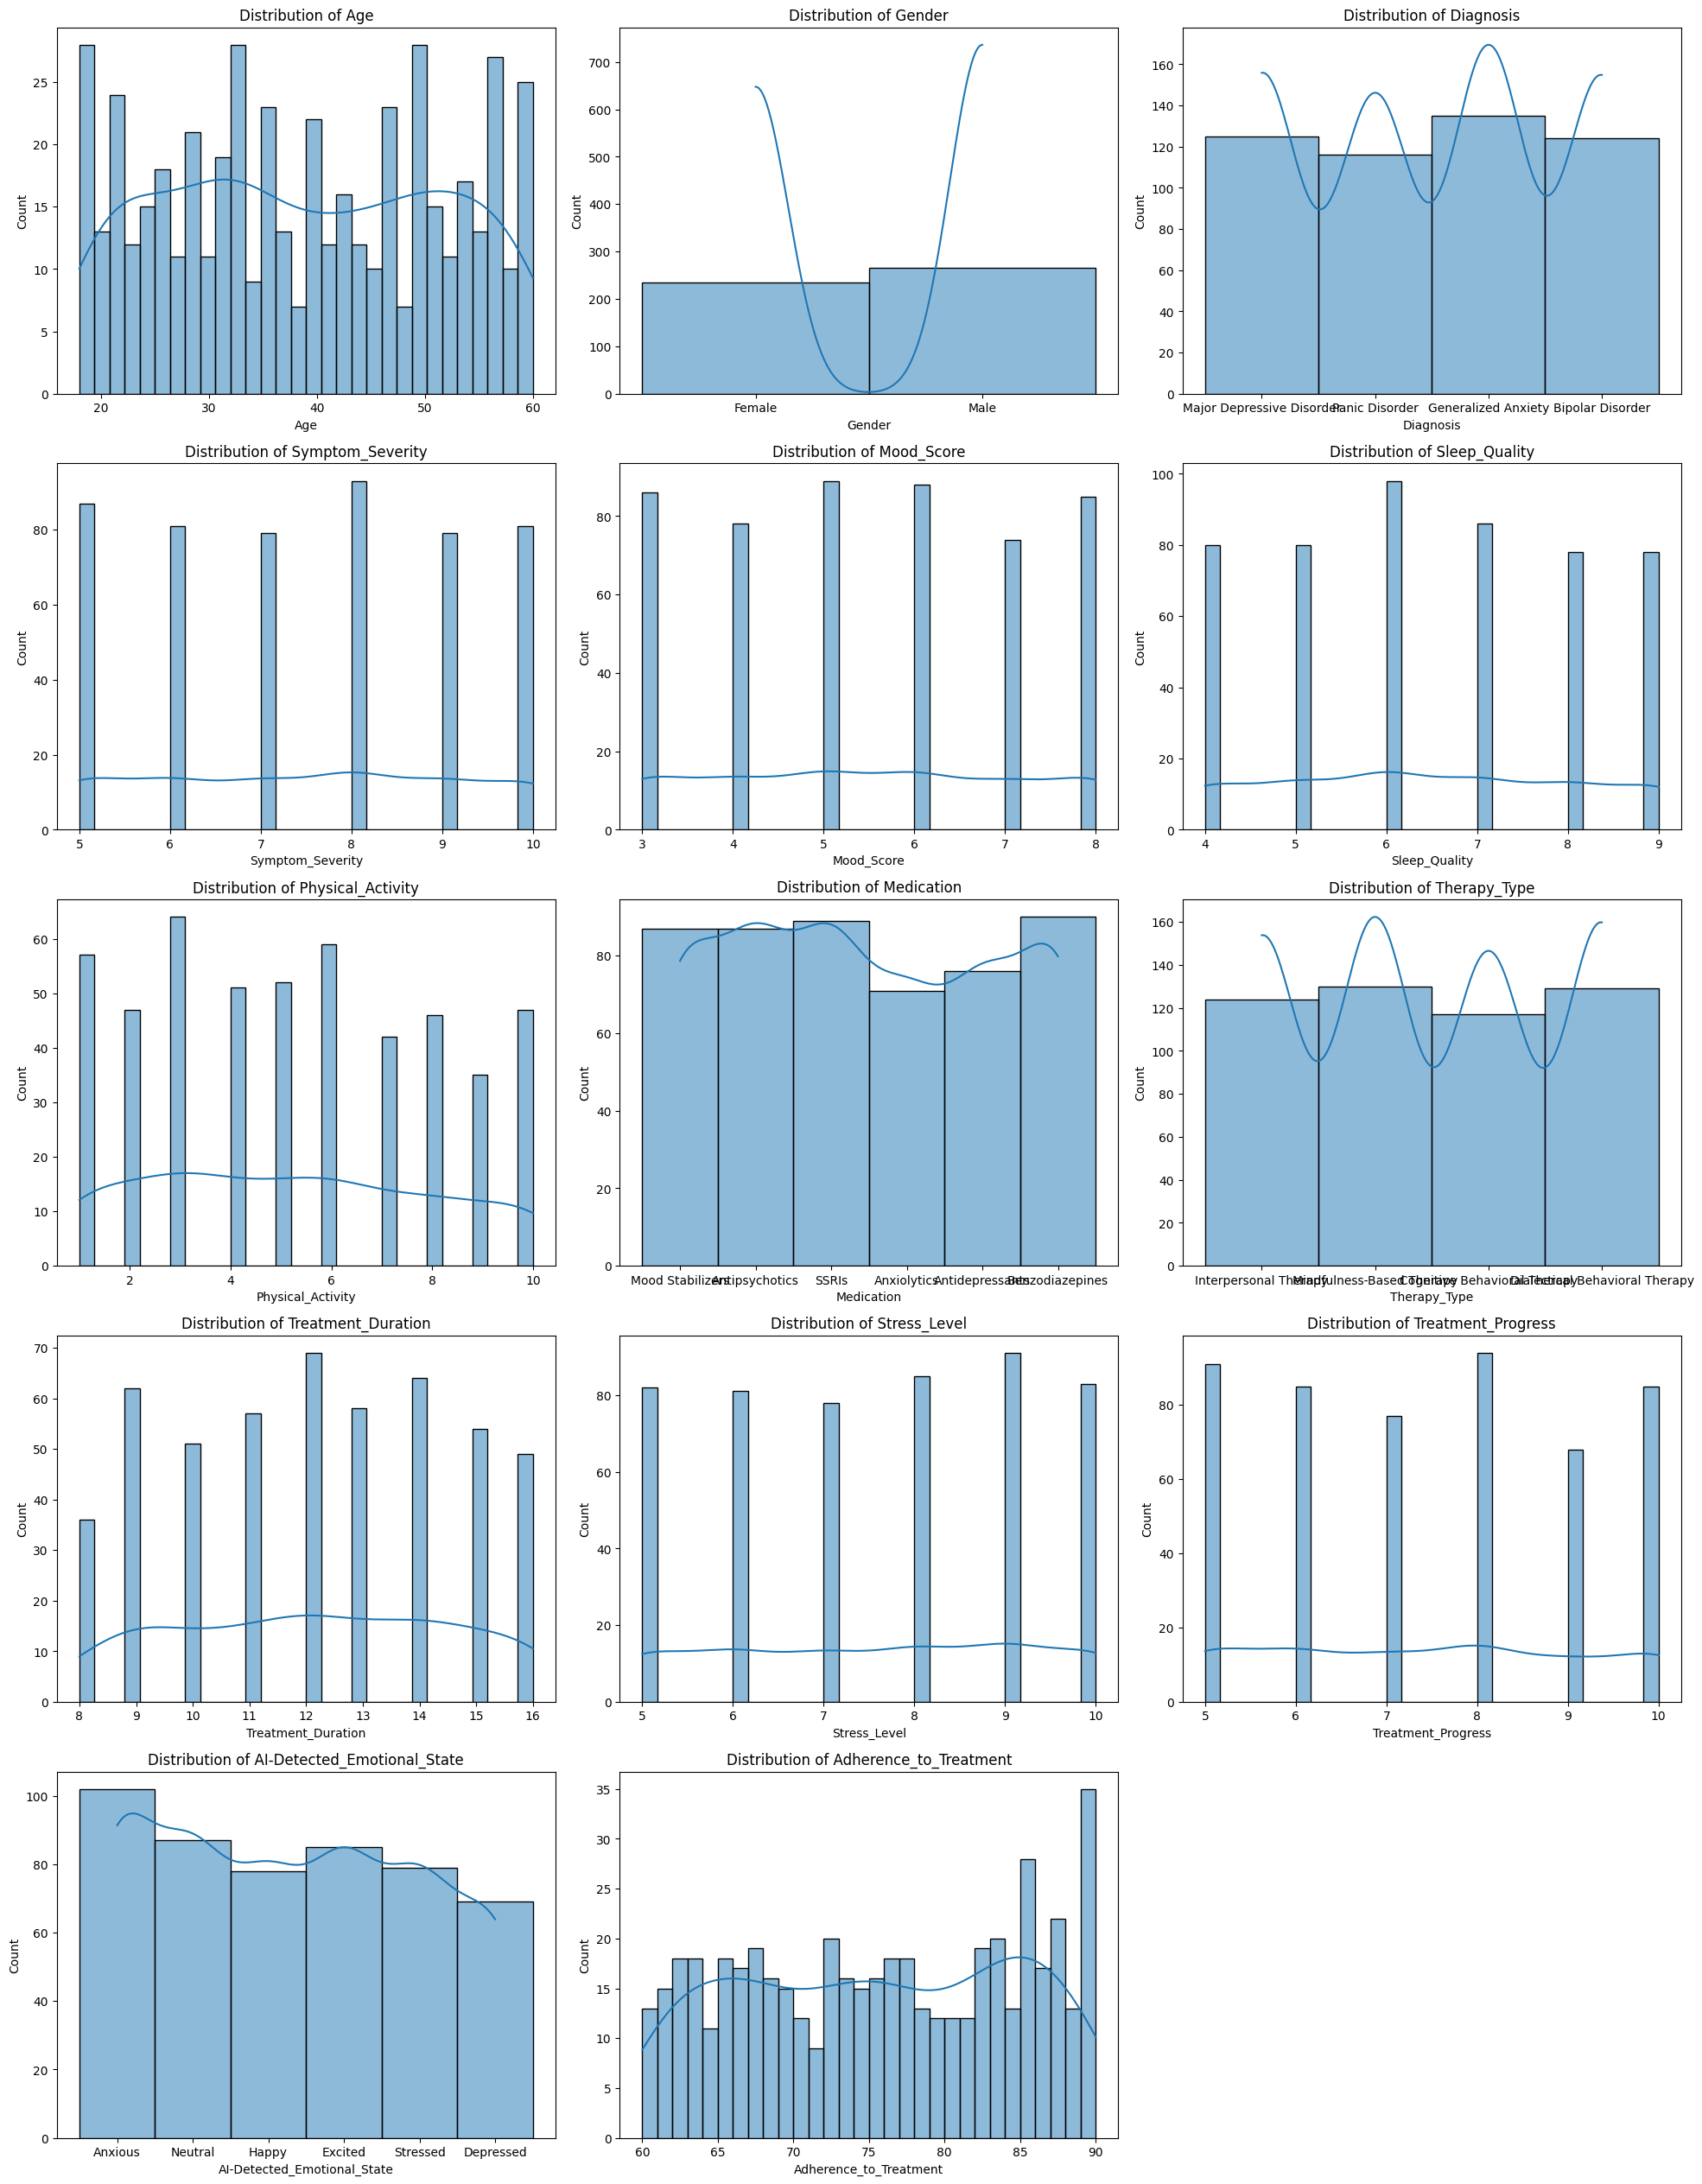

In [22]:
cols = X.columns

plt.figure(figsize=(20, 30))
for i, column in enumerate(cols, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 14), (100, 14), (400,), (100,))

# Modeling

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
nc_model = NearestCentroid()
nc_model.fit(X_train, y_train)

NearestCentroid()

In [26]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [27]:
decisionTree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
mlp_model = MLPClassifier(max_iter=100)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=100)

In [29]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

# Evaluation Model

In [30]:
def evaluate_model_train(model, X_train, y_train):
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_train, y_pred),
        # Precision, recall, dan f1-score harus disesuaikan dengan klasifikasi multi-kelas
        'Precision': precision_score(y_train, y_pred, average='macro'),  # Menggunakan macro average
        'Recall': recall_score(y_train, y_pred, average='macro'),        # Menggunakan macro average
        'F1-Score': f1_score(y_train, y_pred, average='macro')           # Menggunakan macro average
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train(knn_model, X_train, y_train),
    'Decision Tree (DT)': evaluate_model_train(decisionTree_model, X_train, y_train),
    'Nearest Centroid (NC)': evaluate_model_train(nc_model, X_train, y_train),
    'MLPClassifier (MLP)': evaluate_model_train(mlp_model, X_train, y_train),
    'Naive Bayes (NB)': evaluate_model_train(gaussianNB_model, X_train, y_train),
    'Support Vector (SVM)': evaluate_model_train(svm_model, X_train, y_train)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)    0.6400   0.669227  0.639659  0.640525
1         Decision Tree (DT)    0.5775   0.599311  0.577171  0.567184
2      Nearest Centroid (NC)    0.4325   0.432952  0.432387  0.429723
3        MLPClassifier (MLP)    0.7150   0.716718  0.714959  0.715051
4           Naive Bayes (NB)    0.4550   0.454654  0.454906  0.454271
5       Support Vector (SVM)    0.7850   0.795659  0.784854  0.786029


In [31]:
def evaluate_model_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        # Precision, recall, dan f1-score harus disesuaikan dengan klasifikasi multi-kelas
        'Precision': precision_score(y_test, y_pred, average='macro'),  # Menggunakan macro average
        'Recall': recall_score(y_test, y_pred, average='macro'),        # Menggunakan macro average
        'F1-Score': f1_score(y_test, y_pred, average='macro')           # Menggunakan macro average
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_test(knn_model, X_test, y_test),
    'Decision Tree (DT)': evaluate_model_test(decisionTree_model, X_test, y_test),
    'Nearest Centroid (NC)': evaluate_model_test(nc_model, X_test, y_test),
    'MLPClassifier (MLP)': evaluate_model_test(mlp_model, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model_test(gaussianNB_model, X_test, y_test),
    'Support Vector (SVM)': evaluate_model_test(svm_model, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)      0.31   0.298732  0.294525  0.281599
1         Decision Tree (DT)      0.29   0.306766  0.299376  0.283727
2      Nearest Centroid (NC)      0.41   0.416376  0.407484  0.402830
3        MLPClassifier (MLP)      0.28   0.281389  0.271310  0.274601
4           Naive Bayes (NB)      0.41   0.423254  0.403673  0.402518
5       Support Vector (SVM)      0.34   0.343098  0.336798  0.330302


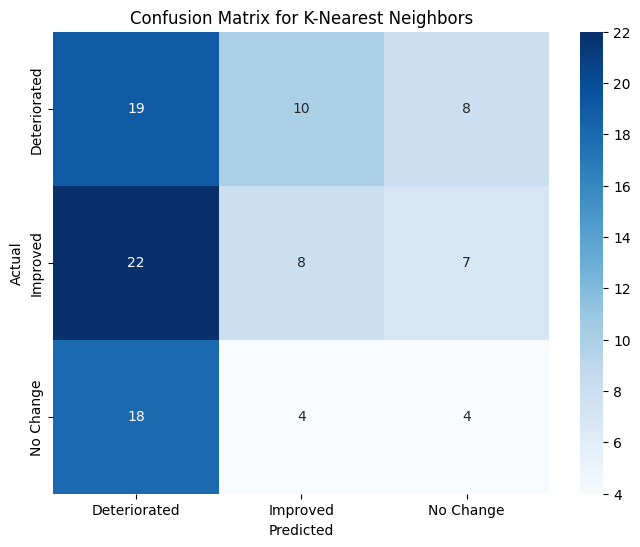

In [32]:
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

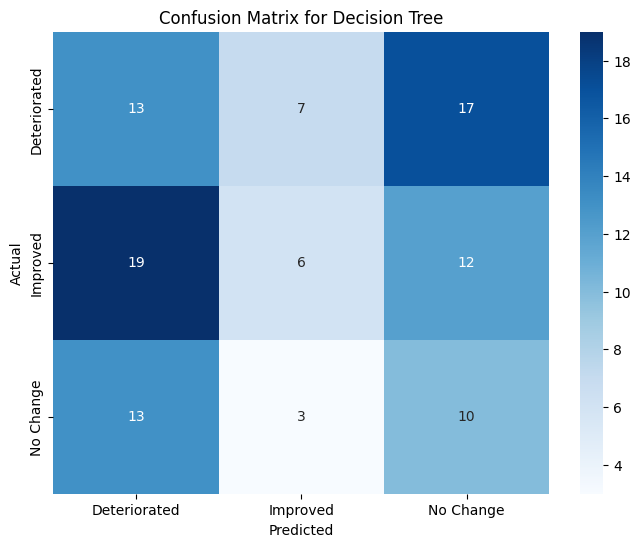

In [33]:
y_pred = decisionTree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

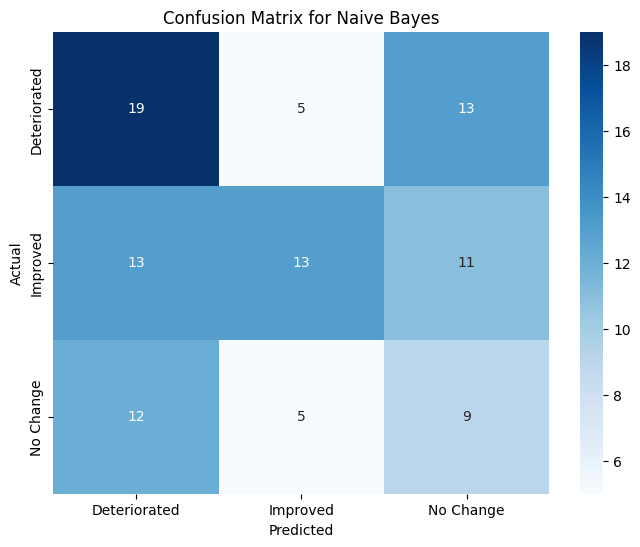

In [34]:
y_pred = gaussianNB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

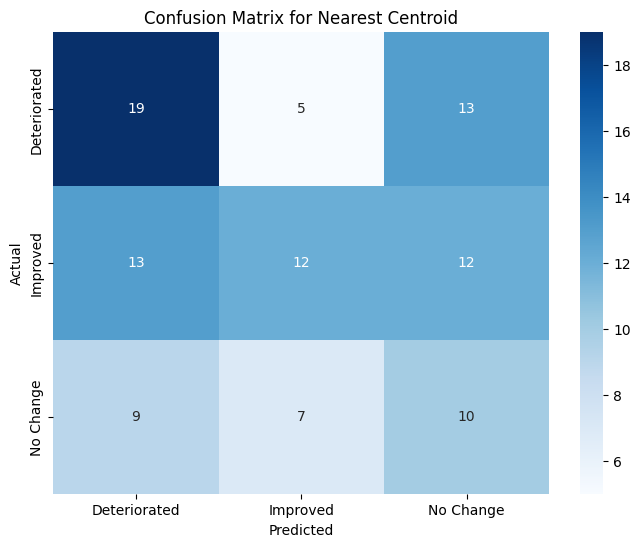

In [35]:
y_pred = nc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Nearest Centroid')
plt.show()

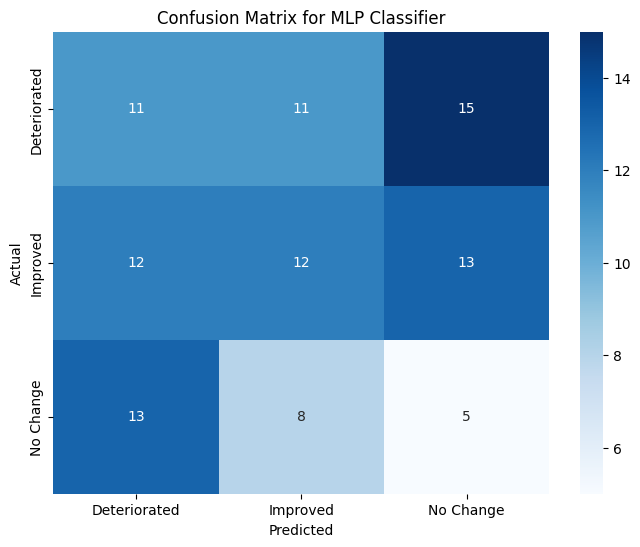

In [36]:
y_pred = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

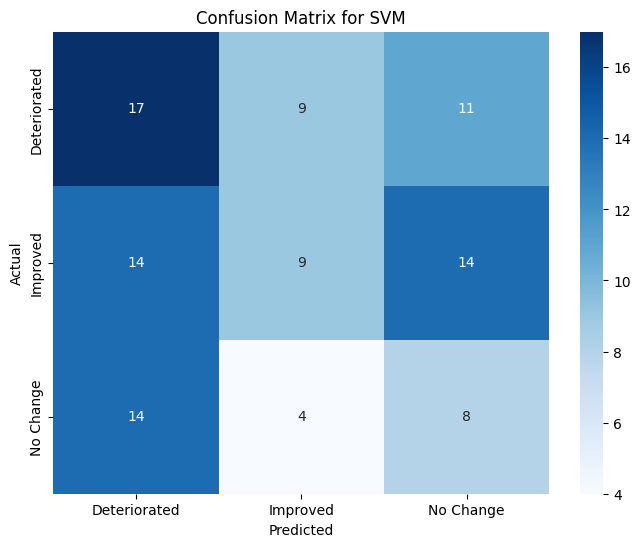

In [37]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# Conclusion

**Evaluation on training data**

                        Model|  Accuracy|  Precision|    Recall|  F1-Score
    K-Nearest Neighbors (KNN)|    0.6400|   0.669227|  0.639659|  0.640525
           Decision Tree (DT)|    0.5775|   0.599311|  0.577171|  0.567184
        Nearest Centroid (NC)|    0.4325|   0.432952|  0.432387|  0.429723
          MLPClassifier (MLP)|    0.7050|   0.705038|  0.705046|  0.705022
             Naive Bayes (NB)|    0.4550|   0.454654|  0.454906|  0.454271
         Support Vector (SVM)|    0.7850|   0.795659|  0.784854|  0.786029

**Evaluation on test data**

                       Model | Accuracy | Precision |   Recall | F1-Score
    K-Nearest Neighbors (KNN)|      0.31|   0.298732|  0.294525|  0.281599
           Decision Tree (DT)|      0.29|   0.306766|  0.299376|  0.283727
        Nearest Centroid (NC)|      0.41|   0.416376|  0.407484|  0.402830
          MLPClassifier (MLP)|      0.35|   0.351650|  0.349619|  0.344279
             Naive Bayes (NB)|      0.41|   0.423254|  0.403673|  0.402518
         Support Vector (SVM)|      0.34|   0.343098|  0.336798|  0.330302

1. **K-Nears Neighbors (KNN)** gives an accuracy result on the training data of 64% and on the test data of 31%. It can be understood that the KNN model is overfitting.
2. **Decision Tree (DT)** showed an accuracy on the training data of 57% and on the test data of 29%. The significant difference between the accuracy of the training data and the test data indicates overfitting in this model. Then the value of precesion which is better than recall can be interpreted that the model is better at predicting false positives than true positives.
3. **Nearest Centroid (NC)** produced an accuracy value on the training data of 43% and on the test data of 41%. The difference that is not too far can be interpreted that the model is quite balanced in predicting training and test data. However, the low accuracy means that the model still has a considerable error in predicting the data. 
4. **MLP Classifier (MLP)** has an accuracy score on training data of 71% and on test data of 35%. There is a very visible difference between the accuracy values on the training data and the test data, it can be understood that the MLP model is overfitting.
5. **Naive Bayes (NB)** gave an accuracy result on the training of 45% and on the test data of 41%. Although there is not too much difference in the accuracy score, we can interpret this model as still having unsatisfactory performance because the accuracy score is relatively low.
6. **Support Vector Machine (SVM)** shows an accuracy score on the training data of 78% and on the test data of 34%. There is a very large difference in accuracy between the training data and the test data, indicating that this model also experiences overfitting. 

Of all the algorithms used, the **NC** and **NB** models can be said to be the best. However, the low accuracy scores also indicate that all models have unsatisfactory performance and actions must be taken to improve the model evaluation values.